In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False, as_supervised=True)

In [22]:
# Set constants
IMG_SIZE = 150  # Resize images to 150x150
BATCH_SIZE = 32

def preprocess_image(image, label):
    # Normalize the pixel values to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    # Resize the image to IMG_SIZE x IMG_SIZE
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label

def prepare_dataset(dataset):
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

# Prepare the datasets
train_dataset = prepare_dataset(train_dataset)
test_dataset = prepare_dataset(test_dataset)

In [23]:
#create your model
##your code goes here##
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Conv2D(64, (3,3), padding='same',input_shape=(150, 150, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Compile the model
##your code goes here##
model = create_model()
model.summary()

# Train the model
##your code goes here##
# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset,
                    callbacks=[early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 87616)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [24]:
#report the accuracy on your test set
##your code goes here##
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy:.4f}')

146/146 [==============================] - 8s 45ms/step - loss: 0.4713 - accuracy: 0.7825
Test accuracy: 0.7825


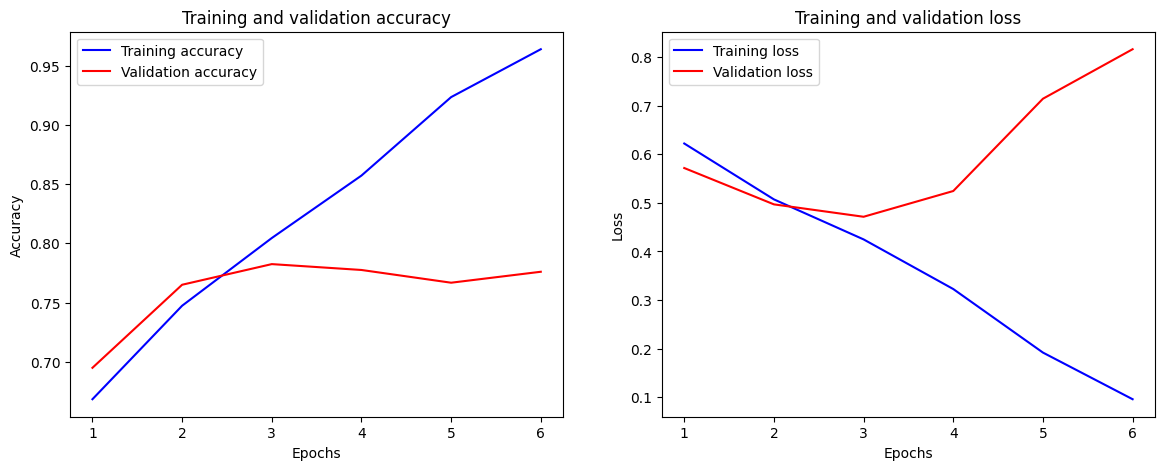

In [26]:
#plot the loss and accuracy
##your code goes here##
import matplotlib.pyplot as plt

def plot_history(history):
    """
    Plots the training and validation loss and accuracy.

    Args:
    history: The history object returned by model.fit().
    """
    # Retrieve the history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create subplots for accuracy and loss
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)